In [11]:
from topagnps2cche1d import Watershed, CrossSection, Reach, Node, Cell

Initialize Watershed

In [12]:
watershed = Watershed()

Create Reaches and add to watershed

In [13]:
# Reaches
reach4 = Reach(id=4, receiving_reach_id=2, slope=0.001)

reach3 = Reach(id=3, receiving_reach_id=2, slope=0.001)

reach2 = Reach(id=2, slope=0.001)

Create Nodes and assign them to reaches

In [14]:
# Nodes
n1 = Node(id=1, dsid=2, x=700, y=100)

n2 = Node(id=2, usid=1, dsid=3, x=600, y=200)

n3 = Node(id=3, usid=2, x=500, y=300)

for node in [n1, n2, n3]:
    reach4.add_node(node)

reach4.us_nd_id = 1
reach4.ds_nd_id = 3

n4 = Node(id=4, dsid=5, x=700, y=700)

n5 = Node(id=5, usid=4, dsid=6, x=600, y=600)

n6 = Node(id=6, usid=5, x=500, y=500)

for node in [n4, n5, n6]:
    reach3.add_node(node)

reach3.us_nd_id = 4
reach3.ds_nd_id = 6

n7 = Node(id=7, dsid=8, x=400, y=400)

n8 = Node(id=8, usid=7, dsid=9, x=300, y=400)

n9 = Node(id=9, usid=8, dsid=10, x=200, y=400)

n10 = Node(id=10, usid=9, x=100, y=400)

for node in [n7, n8, n9, n10]:
    reach2.add_node(node)

reach2.us_nd_id = 7
reach2.ds_nd_id = 10

Create cells

In [15]:
c41 = Cell(id=41, receiving_reach_id=4, area=4.1)
c42 = Cell(id=42, receiving_reach_id=4, area=4.2)
c43 = Cell(id=43, receiving_reach_id=4, area=4.3)

c31 = Cell(id=31, receiving_reach_id=3, area=3.1)
c32 = Cell(id=32, receiving_reach_id=3, area=3.2)
c33 = Cell(id=33, receiving_reach_id=3, area=3.3)

c22 = Cell(id=22, receiving_reach_id=2, area=2.2)
c23 = Cell(id=23, receiving_reach_id=2, area=2.3)

Assign reaches and cells to watershed

In [16]:
for reach in [reach2, reach3, reach4]:
    watershed.add_reach(reach)

for cell in [c41, c42, c43, c31, c32, c33, c22, c23]:
    watershed.add_cell(cell)

Finish setting up watershed

In [17]:
watershed.update_graph()
watershed.determine_reaches_us_ds_direction()
watershed.assign_strahler_number_to_reaches()
watershed.ignore_reaches_with_strahler_leq(0)

# It's important to ignore reaches BEFORE proper junctions are defined
# reach4.ignore_reach()
# -----------------------------------------------
watershed.update_graph()

watershed.update_junctions_and_node_types()
watershed.identify_inflow_sources()

watershed.update_default_us_ds_default_values()

watershed.renumber_all_nodes_and_reaches_in_CCHE1D_computational_order()
watershed.set_node_id_to_compute_id()
# ----------------------------------------------
# df_nodes = watershed.create_cche1d_nodes_df()
# watershed.resample_reaches(id="all", numpoints=21)

watershed.assign_cross_section_to_all_points()

In [18]:
df_nodes = watershed.create_cche1d_nodes_df()
df_nodes

,ND_ID,ND_FRMNO,ND_TYPE,ND_XC,ND_YC,ND_DSID,ND_USID,ND_US2ID,ND_CSID,ND_RSID,ND_STID
0,1,1,0,700.0,100.0,2,-1,-1,9,-1,1
1,2,2,6,600.0,200.0,3,1,-1,10,-1,1
2,3,3,6,500.0,300.0,4,2,-1,11,-1,1
3,4,4,3,400.0,400.0,9,3,-1,12,-1,1
4,5,5,0,700.0,700.0,6,-1,-1,5,-1,1
5,6,6,6,600.0,600.0,7,5,-1,6,-1,1
6,7,7,6,500.0,500.0,8,6,-1,7,-1,1
7,8,8,3,400.0,400.0,9,7,-1,8,-1,1
8,9,9,2,400.0,400.0,10,8,4,1,-1,1
9,10,10,6,300.0,400.0,11,9,-1,2,-1,1


{2, 3, 4}

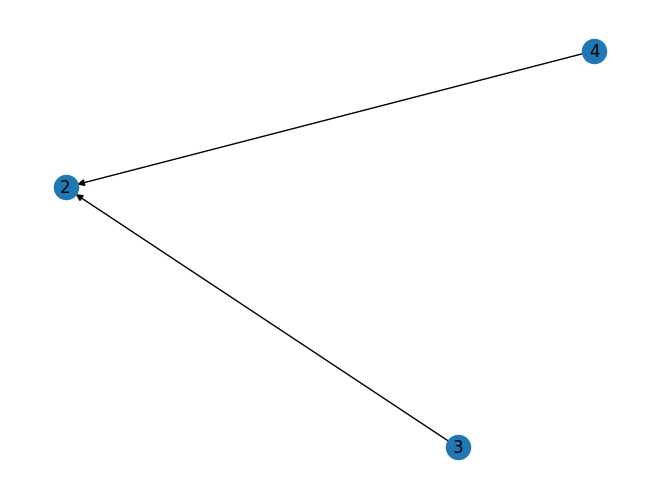

In [26]:
import networkx as nx


G = watershed.current_graph

nx.draw(G, with_labels=True)

set(nx.bfs_tree(G.reverse(), 2))

In [27]:
reach2.receiving_reach_id

In [9]:
# watershed.write_cche1d_dat_files(
#     casename="small_junction", output_folder="C:/Users/Luc/Desktop/test_top2cche1d/small_junction/", sep="\t"
# )

# watershed.write_cche1d_dat_files(
#     casename="small_junction_one_removed", output_folder="C:/Users/Luc/Desktop/test_top2cche1d/small_junction_one_removed/", sep="\t"
# )

casename = "small_junction_one_removed"
watershed.write_cche1d_dat_files(
    casename=casename,
    output_folder=f"C:/Users/Luc/Desktop/test_top2cche1d/{casename}/",
    sep="\t",
)

In [10]:
watershed.plot(frame_height=200)

:Overlay
   .NdOverlay.I  :NdOverlay   [Reach_ID]
      :Curve   [X]   (Y,TYPE,US2ID,USID,ID,COMPUTEID,DSID,CCHE1D_ID,Reach_ID)
   .NdOverlay.II :NdOverlay   [Reach_ID]
      :Scatter   [X]   (Y,TYPE,US2ID,USID,ID,COMPUTEID,DSID,CCHE1D_ID,Reach_ID)

In [17]:
watershed.assign_strahler_number_to_reaches(mode="current")
print(reach2)

-----------------------------
Reach            : 2
CCHE1D Ch. ID    : 2
Receiving Reach  : None
Slope            : 0.001
Strahler Number  : 1
Ignore?          : False
(US/DS) Nodes    : (4, 7)
